# Figure 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

# 2b

In [2]:
CBE_counts = pd.read_csv('mageck/CBE_bc_counts.txt', sep='\t')
ABE_counts = pd.read_csv('mageck/ABE_bc_counts.txt', sep='\t')
CBE_counts = CBE_counts[CBE_counts.columns[2:]]
ABE_counts = ABE_counts[ABE_counts.columns[2:]]

[53.11619452 14.31995016]


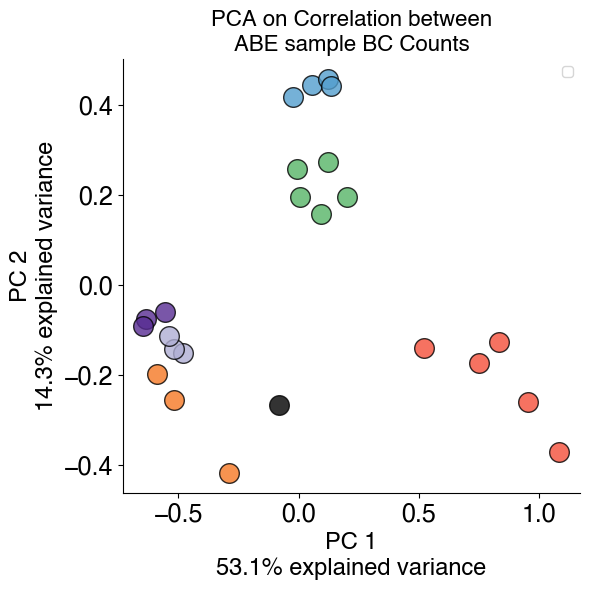

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(ABE_counts.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(6,6))

blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')


blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = [blues[0], blues[2], blues[3], blues[5], greens[1], greens[2], greens[3], greens[4], greens[5],  reds[1], reds[2], reds[3], reds[4], reds[5],
           yellows[1], yellows[2], yellows[3], purples[0], purples[1], purples[2], purples[3], purples[4], purples[5], 'black']



palette = [blues[3], blues[3], blues[3], blues[3], greens[3], greens[3], greens[3], greens[3], greens[3],  reds[3], reds[3], reds[3], reds[3], reds[3],
           yellows[3], yellows[3], yellows[3], purples[2], purples[2], purples[2], purples[5], purples[5], purples[5], 'black']

for i in range(len(Xt)):
    ax.scatter(Xt[i][0], Xt[i][1], edgecolor='black', s=200, alpha=.8,c=palette[i]) #,label=list(ABE_counts.columns)[i])

ax.legend(loc='best')

var = pca.explained_variance_ratio_
print(var*100)
ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% explained variance', fontsize=17)
ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% explained variance', fontsize=17)
#ax.legend(bbox_to_anchor=(1.05, 1.))
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.set_title('PCA on Correlation between\nABE sample BC Counts', fontsize=16)
fig.tight_layout()

# 2c

[36.03498449 11.14300231]


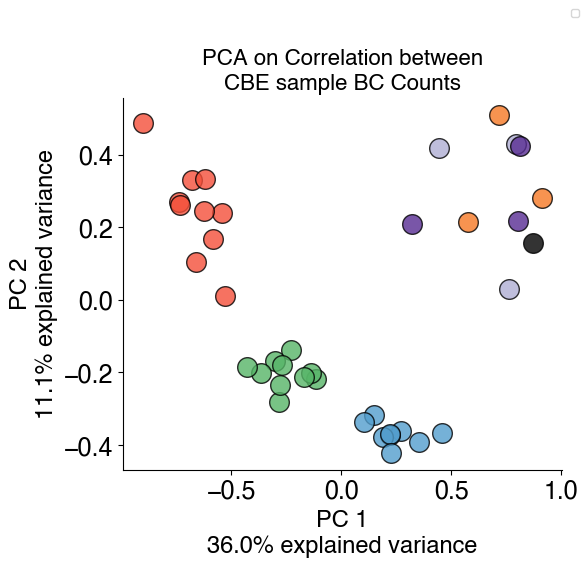

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(CBE_counts.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(6,6))

blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')


blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = [blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], 
           greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3],
           reds[3], reds[3], reds[3], reds[3], reds[3], reds[3],reds[3], reds[3], reds[3], reds[3],
           yellows[3], yellows[3], yellows[3], 
           purples[2], purples[2], purples[2], purples[5], purples[5], purples[5], 
           'black']


for i in range(len(Xt)):
    ax.scatter(Xt[i][0], Xt[i][1], edgecolor='black', s=200, alpha=.8,c=palette[i]) #, label=list(CBE_counts.columns)[i])

ax.legend(loc='best')

var = pca.explained_variance_ratio_
print(var*100)
ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% explained variance', fontsize=17)
ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% explained variance', fontsize=17)
ax.legend(bbox_to_anchor=(1.05, 1.25), fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.set_title('PCA on Correlation between\nCBE sample BC Counts', fontsize=16)
fig.tight_layout()

# 2d

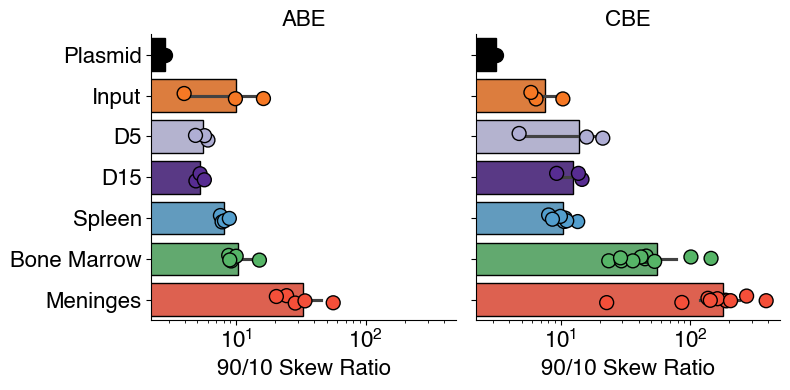

In [5]:
CBE_samps = list(CBE_counts.columns)
ABE_samps = list(ABE_counts.columns)

CBE_skew = []
ABE_skew = []
for i in CBE_samps:
    d = sorted(np.asarray(CBE_counts[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    CBE_skew.append(d[ninety]/d[ten])

for i in ABE_samps:
    d = sorted(np.asarray(ABE_counts[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    ABE_skew.append(d[ninety]/d[ten])

CBE_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_samps, CBE_skew])))
ABE_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_samps, ABE_skew])))

ax_dict_CBE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5', 'spleen6',
       'spleen7', 'spleen8', 'spleen9', 'bonemarrow1', 'bonemarrow2',
       'bonemarrow3', 'bonemarrow4', 'bonemarrow5', 'bonemarrow6',
       'bonemarrow7', 'bonemarrow8', 'bonemarrow9', 'bonemarrow10',
       'meninges1', 'meninges2', 'meninges3', 'meninges4', 'meninges5',
       'meninges6', 'meninges7', 'meninges8', 'meninges9', 'meninges10',
       'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2',
       'd5_rep3', 'd15_rep1', 'd15_rep2', 'd15_rep3', 'plasmidlib'], 
       [4,4,4,4,4,4,4,4,4,
        5,5,5,5,5,5,5,5,5,5,
        6,6,6,6,6,6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

ax_dict_ABE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 
          'bonemarrow1','bonemarrow2', 'bonemarrow3', 'bonemarrow4', 'bonemarrow5',
            'meninges1','meninges2', 'meninges3', 'meninges4', 'meninges5',
              'input_rep1', 'input_rep2', 'input_rep3',
                'd5_rep1', 'd5_rep2', 'd5_rep3', 
                'd15_rep1','d15_rep2', 'd15_rep3', 
                'plasmidlib'], 
       [4,4,4,4,
        5,5,5,5,5,
        6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

CBE_name = []
ABE_name = []
for i, val in CBE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_CBE[s]
    s3 = d2[s2]
    CBE_name.append(s3)

for i, val in ABE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_ABE[s]
    s3 = d2[s2]
    ABE_name.append(s3)

ABE_skew_df['Name'] = ABE_name
CBE_skew_df['Name'] = CBE_name


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()

# 2e

In [6]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')
ABE = MBES[(MBES['Editor']=='ABE') & (MBES['classification']=='targeting guide')]
#CBE_non_leg = MBES[(MBES['Editor']=='CBE') & (MBES['legacy']==False) & (MBES['classification']=='targeting guide')]

CBE = MBES[(MBES['Editor']=='CBE') & (MBES['classification']=='targeting guide')]


ABE_raw = os.listdir('ABE_editing/raw')
CBE_raw = os.listdir('CBE_editing_UPDATED/raw')

#remove spleen 5 do to almost zero reads
ABE_raw.remove('spleen_rep5_ABE.csv')


#set filters for minimum number of sensor reads
min_sensor_reads = 10

t = []
corr = []
name = []

name_dict = {'meninges':'Meninges', 'spleen':'Spleen', 'bonemarrow':'Bone Marrow', 'd5':'D5', 'd15':'D15', 'plasmidlib':'Plasmid', 'input':'Input'}

for i in ABE_raw:
    g = pd.read_csv(f'ABE_editing/raw/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, ABE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
    name.append(name_dict[i.split('_')[0]])


t2 = []
corr2 = []
name2 = []

for i in CBE_raw:
    g = pd.read_csv(f'CBE_editing_UPDATED/raw/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t2.append(np.average(g2['target_base_edit_perc']))
    corr2.append(np.average(g2['corr_perc']))
    name2.append(name_dict[i.split('_')[0]])


CBE_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name2, t2,])))
CBE_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name2, corr2])))
CBE_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_editing = pd.concat((CBE_editing1, CBE_editing2))


ABE_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_editing = pd.concat((ABE_editing1, ABE_editing2))


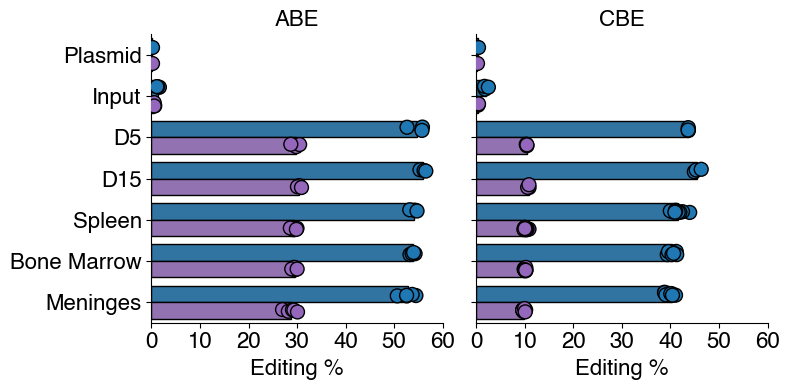

In [7]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

sns.barplot(data = ABE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = CBE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)#), legend=False)


sns.stripplot(data = ABE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=10)
sns.stripplot(data = CBE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=10)#), legend=False)

#sns.stripplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
#sns.stripplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticks([0,10,20,30,40,50,60])
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('Editing %', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)
ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)

fig.tight_layout()
#fig.savefig('figures/fig2e.pdf')


# 2f

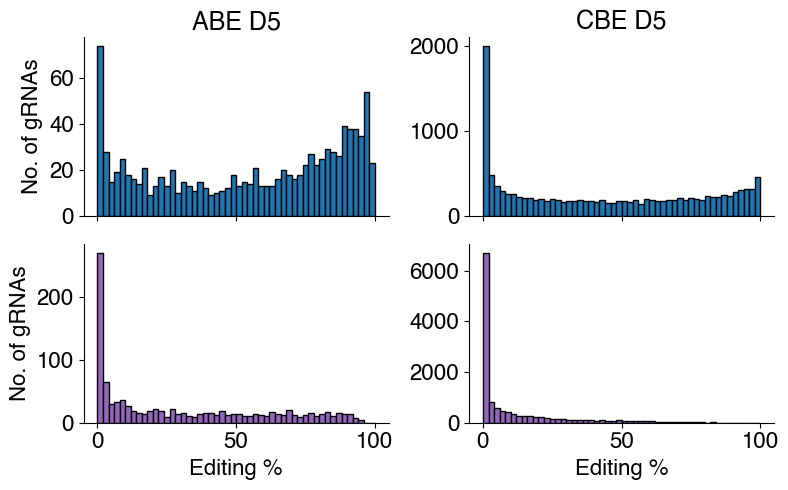

In [8]:
d5_ABE = pd.read_csv('ABE_editing/MLE/d5_ABE_MLE.csv').rename(columns = {'Guide_ID':'gRNA_id'})
d5_CBE = pd.read_csv('CBE_editing_UPDATED/MLE/d5_CBE_MLE.csv').rename(columns = {'Guide_ID':'gRNA_id'})

ABE = MBES[(MBES['Editor']=='ABE') & (MBES['classification']=='targeting guide')]
CBE_non_leg = MBES[(MBES['Editor']=='CBE') & (MBES['classification']=='targeting guide')]

ABE_edits = pd.merge(d5_ABE, ABE, on='gRNA_id')
CBE_edits = pd.merge(d5_CBE, CBE_non_leg, on='gRNA_id')

fig, ax = plt.subplots(2,2,figsize=(8,5), sharex=True, sharey=False)

ax[0][0].hist(ABE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:blue', edgecolor='black')
ax[1][0].hist(ABE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:purple', edgecolor='black')

ax[0][1].hist(CBE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), color='tab:blue', linewidth=1, edgecolor='black')
ax[1][1].hist(CBE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:purple', edgecolor='black')

ax[0][0].spines[['top', 'right']].set_visible(False)
ax[0][0].tick_params(axis='both', which='major', labelsize=16,)
ax[1][0].spines[['top', 'right']].set_visible(False)
ax[1][0].tick_params(axis='both', which='major', labelsize=16,)
ax[0][1].spines[['top', 'right']].set_visible(False)
ax[0][1].tick_params(axis='both', which='major', labelsize=16,)
ax[1][1].spines[['top', 'right']].set_visible(False)
ax[1][1].tick_params(axis='both', which='major', labelsize=16,)
ax[0][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][1].set_xlabel('Editing %', fontsize=16)
ax[1][0].set_xlabel('Editing %', fontsize=16)

ax[0][0].set_title('ABE D5', fontsize=18)
ax[0][1].set_title('CBE D5', fontsize=18)

fig.tight_layout()
#fig.savefig('figures/fig2f.pdf')

# 2g

In [9]:
cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

#MBES = pd.read_csv('MBESv2_CORRECTED.csv')
cc1 = pd.read_csv('master_table_min50_control_mean_invitro.csv')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in cc1.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

cc1['Role in Cancer']=gene_type

In Vitro D15
1 Daxx N274S tab:purple
2 Syk N451S tab:red
3 Ret K809E tab:red
4 Erbb3 Q807R tab:red
5 Raf1 R391G tab:red
784 Trp53 C138R tab:purple
785 Ctcf C384R tab:blue
786 Ctnnb1 T41A tab:red
787 Map2k1 F53L tab:red
788 Vhl N44S tab:blue
Spleen
1 Ercc2 T484A tab:blue
2 Ctnnb1 S45P tab:red
3 Nfe2 Q286R tab:grey
4 Syk N451S tab:red
5 Raf1 R391G tab:red
784 Ctnnb1 D32G tab:red
785 Arid1a D1051G tab:blue
786 Fbxw7 W428R tab:blue
787 Ctnnb1 T41A tab:red
788 Vhl N44S tab:blue
Bone
1 Syk N451S tab:red
2 Arid5b K1026E tab:grey
3 Keap1 H311R tab:blue
4 Ret K809E tab:red
5 Smo I160V tab:red
784 Fbxw7 W428R tab:blue
785 Ctnnb1 T41A tab:red
786 Vhl N44S tab:blue
787 Rhoa L57S tab:purple
788 Arid1a D1051G tab:blue
Meninges
1 Daxx N274S tab:purple
2 Raf1 S259P tab:red
3 Foxa1 Y259C tab:red
4 Keap1 Y33H tab:blue
5 Keap1 Y33H tab:blue
784 Kmt2d K4845R tab:purple
785 Rb1 D597G tab:blue
786 Crebbp Y1504H tab:purple
787 Ctcf C384R tab:blue
788 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

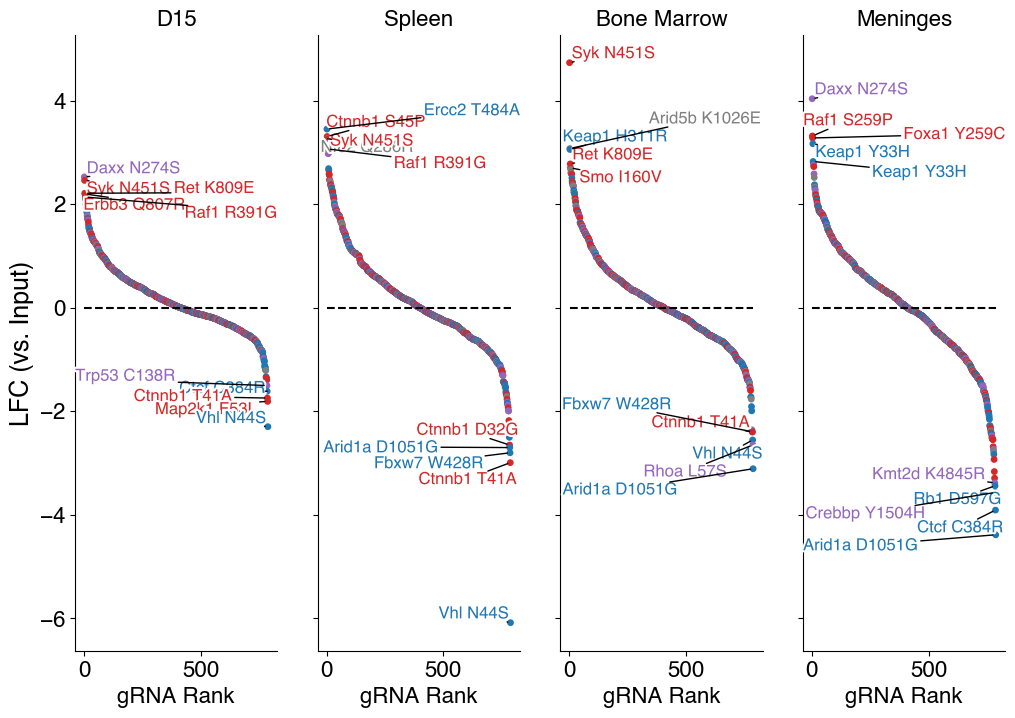

In [10]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]


#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')


        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')
    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)
#fig.savefig('figures/2g.png', dpi=300)

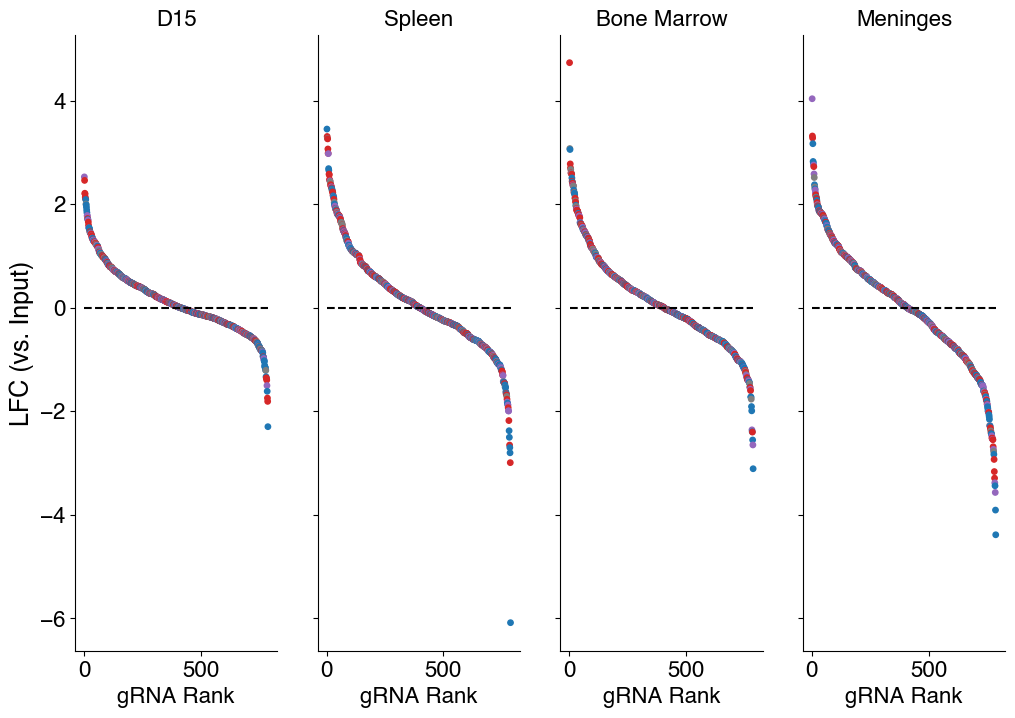

In [61]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]


#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/fig2_min20_ABE.png', dpi=300)

# 2h

In [32]:
cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

#MBES = pd.read_csv('MBESv2_CORRECTED.csv')
cc1 = pd.read_csv('master_table_min50_control_mean_invitro.csv')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in cc1.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

cc1['Role in Cancer']=gene_type

In Vitro D15
1 Kmt2b R2717C tab:grey
2 Tcf7l2 P392S tab:red
3 Rab35 R69H tab:grey
4 Gata2 P175L tab:red
5 Foxp1 R465H tab:red
8282 Apc D1031N tab:blue
8283 Zfhx3 G921E tab:blue
8284 Amer1 R885Q tab:blue
8285 Ptprs R845H tab:grey
8286 Grin2a P1366S tab:blue
Spleen
1 Flt4 p.G1154R (human) tab:red
2 Tek R167W tab:grey
3 Gnas R1004C tab:red
4 Zfhx3 A3330T tab:blue
5 Brd4 E1160K tab:red
8282 Smarca4 R1385* tab:blue
8283 Top1 P610L tab:grey
8284 Dnmt3a P800L tab:blue
8285 Smarca4 A945T tab:blue
8286 Sesn2 R95C tab:grey
Bone
1 Tek R167W tab:grey
2 Apc Q976* tab:blue
3 Palb2 Q962* tab:blue
4 Zfhx3 R3006W tab:blue
5 Zfhx3 R60H tab:blue
8282 Syk R584W tab:red
8283 Smarca4 R978Q tab:blue
8284 Arid2 S297F tab:blue
8285 Smarca4 R1385* tab:blue
8286 Smarca4 A945T tab:blue
Meninges
1 Ptprt E1324K tab:blue
2 Gata3 R275W tab:purple
3 Axl G833E tab:grey
4 Cdk12 Q598* tab:blue
5 Prdm14 P413L tab:grey
8282 Hist1h3a p.A47V (human) tab:grey
8283 Ptprs A416V tab:grey
8284 Kdm5a R145H tab:red
8285 Insr D569N 

Text(0.5, 1.0, 'Meninges')

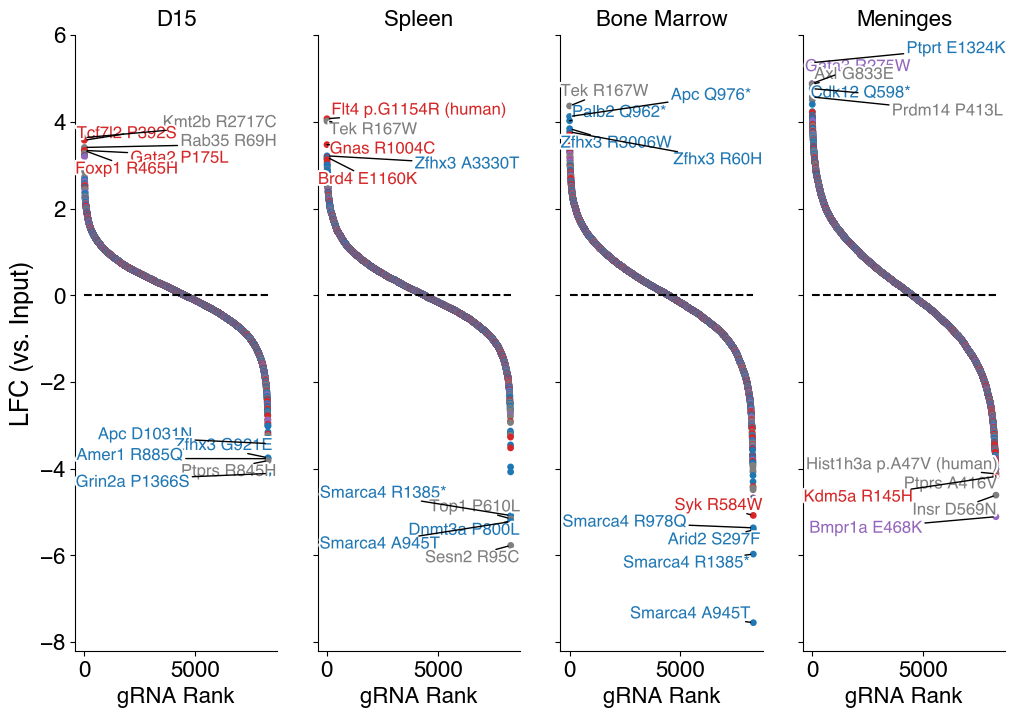

In [58]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/2h.png', dpi=300)

Text(0.5, 1.0, 'Meninges')

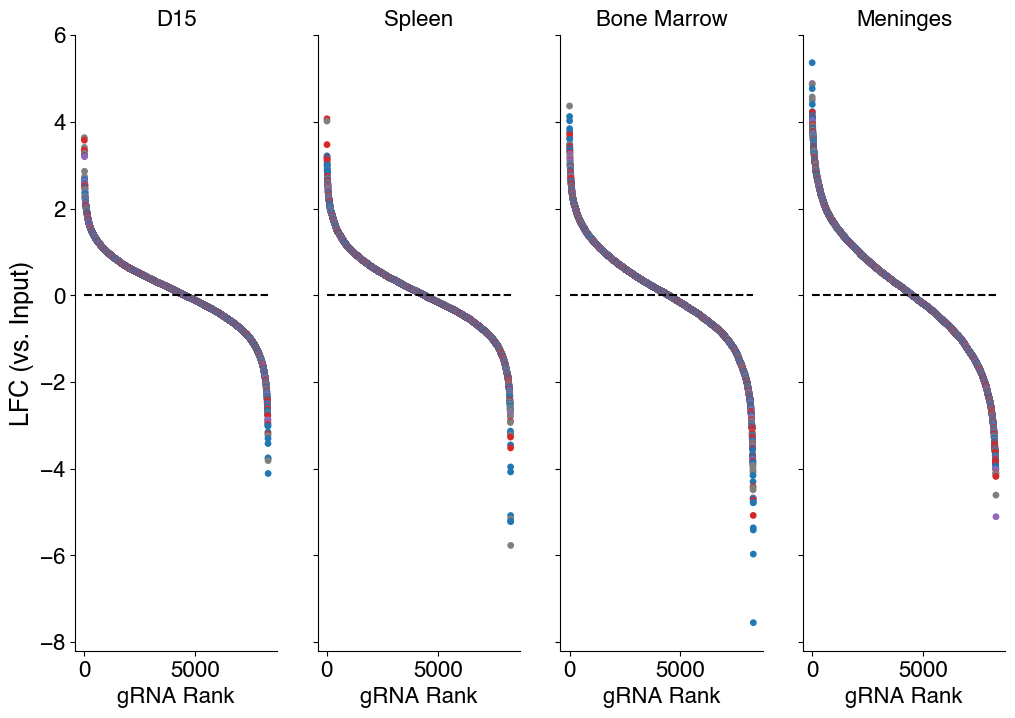

In [113]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/fig2_CBE_min20.png', dpi=300)

# Lollipop plots

Looking at genes with biggest range of gRNA LFC (for highly represented genes)


In [9]:
master = pd.read_csv('master_table_min50_control_mean_invitro.csv')


#put editing efficiency cutoff here
master_targ = master[(master['classification']=='targeting guide') & (master['target_base_edit_perc']>=20)]

u, c= np.unique(master_targ['gene_name_m'], return_counts=True)
dd = pd.DataFrame(dict(zip(['gene', 'count'], [u,c]))).sort_values(by='count', ascending=False)

#num_hits = 100
#topx = dd[:num_hits]

count_cutoff = 30
topx = dd[dd['count']>=count_cutoff]
subset = master_targ[master_targ['gene_name_m'].isin(list(topx['gene']))]


tissues = ['In Vitro D15', 'Spleen', 'Bone', 'Meninges']


for tissue in tissues:

    ranges = []
    for i in list(topx['gene']):
        sub2 =list(subset[subset['gene_name_m']==i][f'Z_{tissue}'])
        range1 = max(sub2)-min(sub2)
        ranges.append(range1)
    
    topx[f'range_{tissue}'] = ranges
    #topx = topx.sort_values(by='range',ascending=False)

#fig, ax = plt.subplots(figsize=(5,15))

#sns.boxplot(data=subset, y='gene_name_m', x=f'LFC_{tissue}', order=list(topx[:num_hits]['gene']))
#ax.set_title(f'{tissue} |  target base editing ≥ 20%', fontsize=14)

In [20]:
iv_genes = list(topx.sort_values(by='range_In Vitro D15', ascending=False)[:2]['gene'])
spleen_genes = list(topx.sort_values(by='range_Spleen', ascending=False)[:2]['gene'])
spleen_genes2 = list(topx.sort_values(by='range_Spleen', ascending=False)[2:4]['gene'])

bone_genes = list(topx.sort_values(by='range_Bone', ascending=False)[:2]['gene'])
bone_genes2 = list(topx.sort_values(by='range_Bone', ascending=False)[2:4]['gene'])

men_genes =  list(topx.sort_values(by='range_Meninges', ascending=False)[:2]['gene'])
men_genes2 =  list(topx.sort_values(by='range_Meninges', ascending=False)[2:4]['gene'])

combined_genes = [iv_genes, spleen_genes, spleen_genes2, bone_genes, bone_genes2, men_genes, men_genes2]
combined_genes

[['Grin2a', 'Ptprs'],
 ['Smarca4', 'Dnmt3a'],
 ['Ikzf1', 'Atm'],
 ['Smarca4', 'Apc'],
 ['Arid2', 'Ntrk3'],
 ['Arid1a', 'Ptprt'],
 ['Crebbp', 'Kmt2b']]

In [5]:
topx.sort_values(by='range_Meninges', ascending=False)

gene  count  range_In Vitro D15  range_Spleen  range_Bone  \
337   Ptprt    158              5.0170       5.19540      7.1553   
215   Kmt2b     98              5.8228       4.41800      5.5580   
17   Arid1a    145              4.7201       5.59400      5.8913   
196    Insr     42              4.8798       3.55710      5.0643   
135    Fat1     79              4.2480       4.04380      4.9368   
..      ...    ...                 ...           ...         ...   
415   Stk11     40              4.3109       2.61991      4.0234   
121   Erbb4     40              3.0410       3.43940      4.7303   
37     Bcl2     31              4.2293       3.91020      3.6158   
143   Fgfr4     31              3.4355       2.75130      3.3463   
411   Stat3     30              3.1138       4.10020      4.3293   

     range_Meninges  
337          8.2059  
215          7.9187  
17           7.7809  
196          7.7728  
135          7.7175  
..              ...  
415          4.3155  
121          4.2998  
37           4.1446  
143          4.1196  
411          4.0959  

[95 rows x 6 columns]

112
89
136
80
50
44
136
63
48
54
144
153
83
98


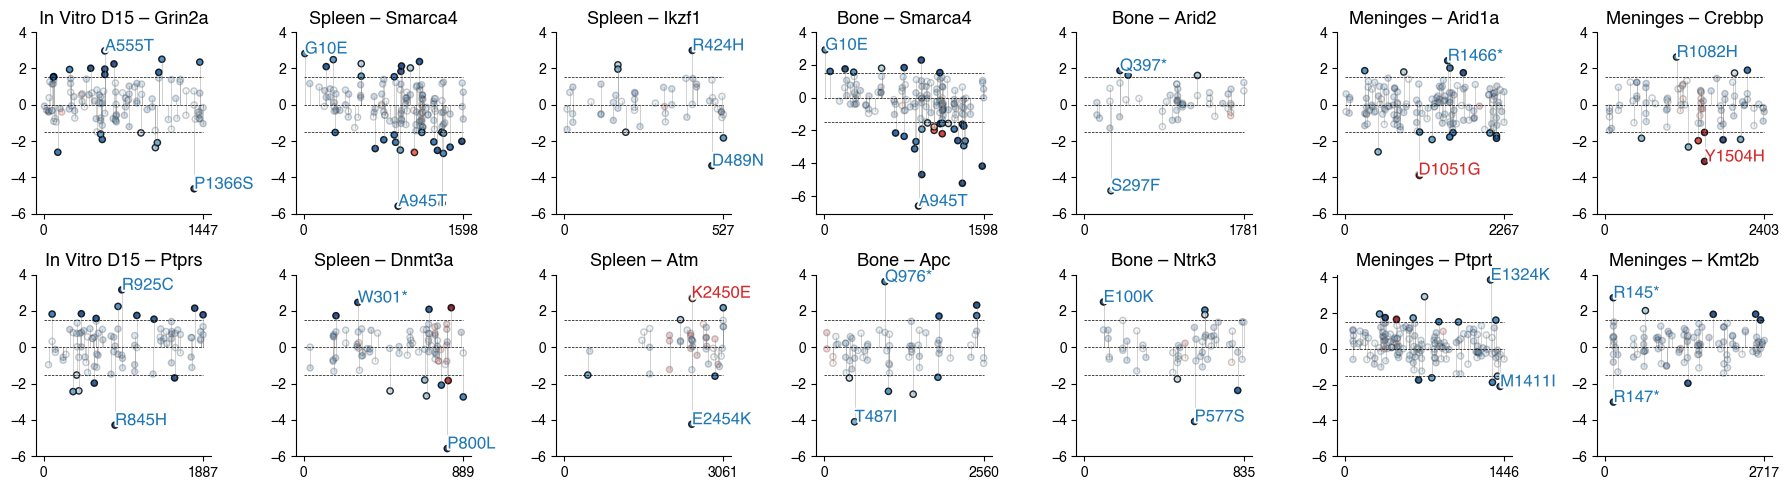

In [23]:

#for idx, gene in enumerate(top_genes[:5]):
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

#gene = 'Smarca4'

#genes = ['Kmt2d', 'Arid1a', 'Ptprt', 'Smarca4', 'Trp53']

fig, ax = plt.subplots(2,7,figsize=(18,5), sharey=False) #sharey='col',)


tissues = ['In Vitro D15', 'Spleen', 'Spleen', 'Bone', 'Bone', 'Meninges', 'Meninges']


for idx, tissue in enumerate(tissues):

    #ptprt = cc1[(cc1['gene_name_m']==gene) & (cc1['legacy']==False) & (cc1['classification_h'].isin(['Missense', 'Nonsense'])) & (cc1['target_base_edit_perc']>=20)]
    for kk, val in enumerate(combined_genes[idx]):


        ptprt = master_targ[(master_targ['gene_name_m']==val) & (master_targ['classification_h'].isin(['Missense', 'Nonsense']))]

        ptprt['codon'] = [int(i[1:-1]) for i in ptprt['HGVSp_m']]

        samples = ['Z_In Vitro D15', 'Z_Spleen', 'Z_Bone', 'Z_Meninges']
        samp_dict = dict(zip(samples, ['In Vitro', 'Spleen', 'Bone', 'Meninges']))

        for jj, val3 in ptprt.iterrows():
            x = val3['codon']
            y = val3[f'Z_{tissue}']


            ax[kk][idx].plot([x,x],[0,y], color='tab:gray', linewidth=0.5, alpha=.5)

        ptprt1 = ptprt[ptprt['Editor']=='ABE']
        ptprt2 = ptprt[ptprt['Editor']=='CBE']

        print(len(ptprt))
        #marker_sizes1 = 5*(-np.log10(np.asarray(sorted(ptprt1[f'FDR_{val2[4:]}']))+1e-10))**2 + 20
        #marker_sizes2 = 5*(-np.log10(np.asarray(sorted(ptprt2[f'FDR_{val2[4:]}']))+1e-10))**2 + 20
        val2 = f'Z_{tissue}'

        ptprt1_1 = ptprt1[(ptprt1[val2]<=1.5) | (ptprt1[val2]>=-1.5)]
        ptprt1_2 = ptprt1[(ptprt1[val2]>=1.5) | (ptprt1[val2]<=-1.5)]
        ptprt2_1 = ptprt2[(ptprt2[val2]<=1.5) | (ptprt2[val2]>=-1.5)]
        ptprt2_2 = ptprt2[(ptprt2[val2]>=1.5) | (ptprt2[val2]<=-1.5)]

        #ptprt1_1 = ptprt1[(ptprt1[val2]<=1.5)] 
        #ptprt1_2 = ptprt1[(ptprt1[val2]>=1.5)] 
        #ptprt2_1 = ptprt2[(ptprt2[val2]<=1.5)] 
        #ptprt2_2 = ptprt2[(ptprt2[val2]>=1.5)]

        ax[kk][idx].scatter(ptprt1_1['codon'], ptprt1_1[val2], c=ptprt1_1['target_base_edit_perc'], cmap='Reds', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.2)
        ax[kk][idx].scatter(ptprt1_2['codon'], ptprt1_2[val2], c=ptprt1_2['target_base_edit_perc'], cmap='Reds', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.8)



        ax[kk][idx].scatter(ptprt2_1['codon'], ptprt2_1[val2], c=ptprt2_1['target_base_edit_perc'], cmap='Blues', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.2)
        ax[kk][idx].scatter(ptprt2_2['codon'], ptprt2_2[val2], c=ptprt2_2['target_base_edit_perc'], cmap='Blues', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.8)

        #and annotate top 2 and bototm 2 variants
        #and annotate top and bottom 5 variant
        tops = pd.concat((ptprt1_2, ptprt2_2)).sort_values(by=val2, ascending=False)[:1]
        bottoms = pd.concat((ptprt1_2, ptprt2_2)).sort_values(by=val2, ascending=True)[:1]
        tb = pd.concat((tops, bottoms))

        t = []
        x = []
        y = []
        c = []

        c_dict2 = {'ABE':'tab:red', 'CBE':'tab:blue'}
        for i, val3 in tb.iterrows():
            y.append(val3[val2])
            x.append(val3['codon'])
            c.append(c_dict2[val3['Editor']])
            a = val3['HGVSp_m']
    
            t.append(a)
            
        texts = [ax[kk][idx].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

        #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[kk][idx], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))



        #ax[kk].legend(*sc.legend_elements("sizes", num=6))
        #ax[kk].set_title(samp_dict[val2], fontsize=14)

        if kk==3:
            ax[kk][idx].spines[['top', 'right']].set_visible(False)
        else:
            ax[kk][idx].spines[['top', 'right',]].set_visible(False)
            ax[kk][idx].set_xticks([0, max(ptprt['codon'])])


        ax[kk][idx].tick_params(axis='both', which='major', labelsize=10,)
        ax[kk][idx].plot([0, max(ptprt['codon'])], [0,0], linestyle='dashed', color='black',linewidth=.5)
        ax[kk][idx].plot([0, max(ptprt['codon'])], [1.5,1.5], linestyle='dashed', color='black',linewidth=.5)
        ax[kk][idx].plot([0, max(ptprt['codon'])], [-1.5,-1.5], linestyle='dashed', color='black',linewidth=.5)

        ax[kk][idx].set_yticks([-6,-4,-2,0,2,4])

        #ax[0][idx].set_title(f'{tissue}', fontsize=16)
        ax[kk][idx].set_title(f'{tissue} – {val}', fontsize=13)
        #ax[0][idx].set_ylim(-5,5)
        ax[kk][idx].patch.set_facecolor('None')

fig.tight_layout()
#fig.savefig('figures/lollipop_fig2.png', dpi=300)

# Modified waterfall plots

- Based on gene function

In [85]:
TFs = pd.read_excel('source_data/gene_classifications/Human_TF_Gold_Standard_CRISPR_Nuclease.xlsx')[['Gene']]
ubiquitin_ligases = pd.read_excel('source_data/gene_classifications/Hs-Ubiquitin-Ligases-Pooled-shRNA-Library-Gene-List.xlsx').rename(columns = {'Gene Symbol':'Gene'})
kinome = pd.read_excel('source_data/gene_classifications/Vakoc_Human_Kinome_Gene_List.xlsx').rename(columns = {'Symbol':'Gene'}).drop_duplicates().reset_index(drop=True)
DDR = pd.read_excel('source_data/gene_classifications/Human_DDR_Gold_Standard_CRISPR_Nuclease.xlsx')[['Gene']]
chromatin = pd.read_excel('source_data/gene_classifications/Human_Chromatin_Gold_Standard_CRISPR_Nuclease.xlsx')[['Gene']].drop_duplicates().reset_index(drop=True)
rbps = pd.read_excel('source_data/gene_classifications/RBPs.xlsx', header=1).rename(columns = {'Gene name':'Gene'}).drop_duplicates().reset_index(drop=True)
druggable = pd.read_excel('source_data/gene_classifications/SaturnV_v2.0_Human_CRISPR_Input_DRUGGABLE.xlsx')[['Gene']].drop_duplicates().reset_index(drop=True)
chip = pd.read_excel('source_data/gene_classifications/CHIP_CH_Mutational_Compendium41586_2020_2819_MOESM1_ESM.xlsx', sheet_name='S3', header=1)[['Gene']].drop_duplicates(subset='Gene').reset_index(drop=True)


TFs['gene_function'] = 'TF'
ubiquitin_ligases['gene_function'] = 'Ubiquitin Ligase'
kinome['gene_function'] = 'Kinase'
DDR['gene_function'] = 'DDR'
chromatin['gene_function'] = 'Chromatin'
rbps['gene_function'] = 'RBP'
druggable['gene_function'] = 'Druggable Genome'
chip['gene_function'] = 'CHIP'

gene_funcs = pd.concat((TFs, ubiquitin_ligases, kinome, DDR, chromatin, rbps, druggable, chip))[['Gene', 'gene_function']]

In [98]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')
MBES_targ =  MBES[MBES['classification']=='targeting guide'].drop_duplicates(subset='gene_name_h').reset_index(drop=True)[['gene_name_h']]


tfs = []
ubiq = []
kin = []
ddr_list = []
chrom = []
rbp_list = []
drug = []
chip_list = []

multiple = []
classified = []

for i, val in MBES_targ.iterrows():

    g = val['gene_name_h']

    subset = list(gene_funcs[gene_funcs['Gene']==g]['gene_function'])

    if len(subset)==0:
        tfs.append(False)
        ubiq.append(False)
        kin.append(False)
        ddr_list.append(False)
        chrom.append(False)
        rbp_list.append(False)
        drug.append(False)
        chip_list.append(False)

        multiple.append(False)
        classified.append(False)
    
    elif len(subset)>=1:
        classified.append(True)
        if len(subset)>=2:
            multiple.append(True)
        elif len(subset)==1:
            multiple.append(False)

        if 'TF' in subset:
            tfs.append(True)
        if 'Ubiquitin Ligase' in subset:
            ubiq.append(True)
        if 'Kinase' in subset:
            kin.append(True)
        if 'DDR' in subset:
            ddr_list.append(True)
        if 'Chromatin' in subset:
            chrom.append(True)
        if 'RBP' in subset:
            rbp_list.append(True)
        if 'Druggable Genome' in subset:
            drug.append(True)
        if 'CHIP' in subset:
            chip_list.append(True)

        if 'TF' not in subset:
            tfs.append(False)
        if 'Ubiquitin Ligase' not in subset:
            ubiq.append(False)
        if 'Kinase' not in subset:
            kin.append(False)
        if 'DDR' not in subset:
            ddr_list.append(False)
        if 'Chromatin' not in subset:
            chrom.append(False)
        if 'RBP' not in subset:
            rbp_list.append(False)
        if 'Druggable Genome' not in subset:
            drug.append(False)
        if 'CHIP' not in subset:
            chip_list.append(False)

MBES_targ['classified'] = classified
MBES_targ['multiple'] = multiple
MBES_targ['TF'] = tfs
MBES_targ['Ubiquitin Ligase'] = ubiq
MBES_targ['Kinase'] = kin
MBES_targ['DDR'] = ddr_list
MBES_targ['RBP'] = rbp_list
MBES_targ['Druggable'] = drug
MBES_targ['CHIP'] = chip_list
MBES_targ['Chromatin'] = chrom





<BarContainer object of 10 artists>

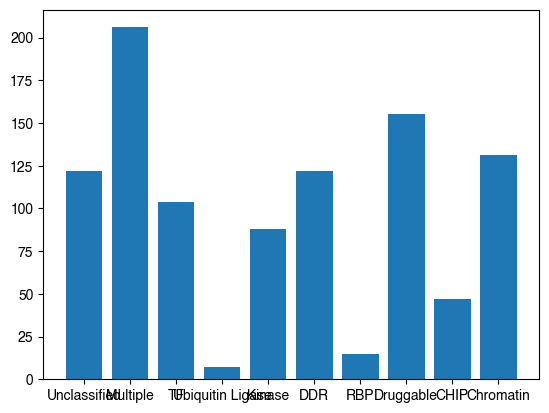

In [99]:
num_none = len(MBES_targ[MBES_targ['classified']==False])
num_multiple = len(MBES_targ[MBES_targ['multiple']==True])
num_TF = len(MBES_targ[MBES_targ['TF']==True])
num_ubiq = len(MBES_targ[MBES_targ['Ubiquitin Ligase']==True])
num_kin = len(MBES_targ[MBES_targ['Kinase']==True])
num_ddr = len(MBES_targ[MBES_targ['DDR']==True])
num_rbp = len(MBES_targ[MBES_targ['RBP']==True])
num_druggable = len(MBES_targ[MBES_targ['Druggable']==True])
num_chip = len(MBES_targ[MBES_targ['CHIP']==True])
num_chromatin = len(MBES_targ[MBES_targ['Chromatin']==True])

names = ['Unclassified', 'Multiple', 'TF', 'Ubiquitin Ligase', 'Kinase', 'DDR', 'RBP', 'Druggable', 'CHIP', 'Chromatin']
nums = [num_none, num_multiple, num_TF, num_ubiq, num_kin, num_ddr, num_rbp, num_druggable, num_chip, num_chromatin]

plt.bar(names, nums)

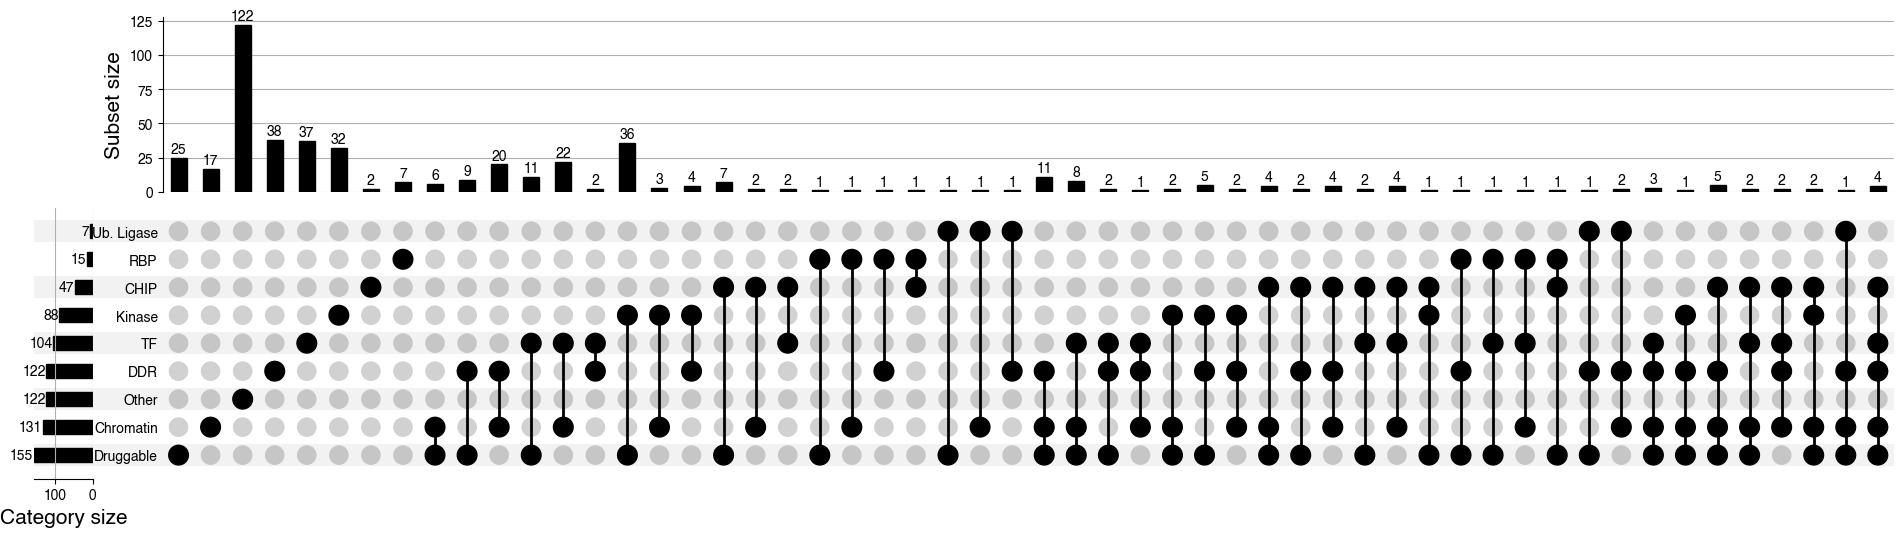

In [107]:
from upsetplot import from_contents

num_none = list(MBES_targ[MBES_targ['classified']==False]['gene_name_h'])
num_TF = list(MBES_targ[MBES_targ['TF']==True]['gene_name_h'])
num_ubiq = list(MBES_targ[MBES_targ['Ubiquitin Ligase']==True]['gene_name_h'])
num_kin = list(MBES_targ[MBES_targ['Kinase']==True]['gene_name_h'])
num_ddr = list(MBES_targ[MBES_targ['DDR']==True]['gene_name_h'])
num_rbp = list(MBES_targ[MBES_targ['RBP']==True]['gene_name_h'])
num_druggable = list(MBES_targ[MBES_targ['Druggable']==True]['gene_name_h'])
num_chip = list(MBES_targ[MBES_targ['CHIP']==True]['gene_name_h'])
num_chromatin = list(MBES_targ[MBES_targ['Chromatin']==True]['gene_name_h'])


names = ['Other', 'TF', 'Ub. Ligase', 'Kinase', 'DDR', 'RBP', 'Druggable', 'CHIP', 'Chromatin']
nums = [num_none, num_TF, num_ubiq, num_kin, num_ddr, num_rbp, num_druggable, num_chip, num_chromatin]

comb = from_contents(
    dict(zip(names, nums))
)

fig = plt.figure(figsize=(24, 6))
plot_result = upsetplot.plot(comb, subset_size='count', show_counts=True, fig=fig,element_size=None)
#plt.suptitle("Setting figsize explicitly")

plot_result["intersections"].set_ylabel("Subset size", fontsize=15)
plot_result["totals"].set_xlabel("Category size", fontsize=15)

plt.show()

In [109]:
cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

#MBES = pd.read_csv('MBESv2_CORRECTED.csv')
cc1 = pd.read_csv('master_table_min50_control_mean_invitro.csv')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in cc1.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

cc1['Role in Cancer']=gene_type

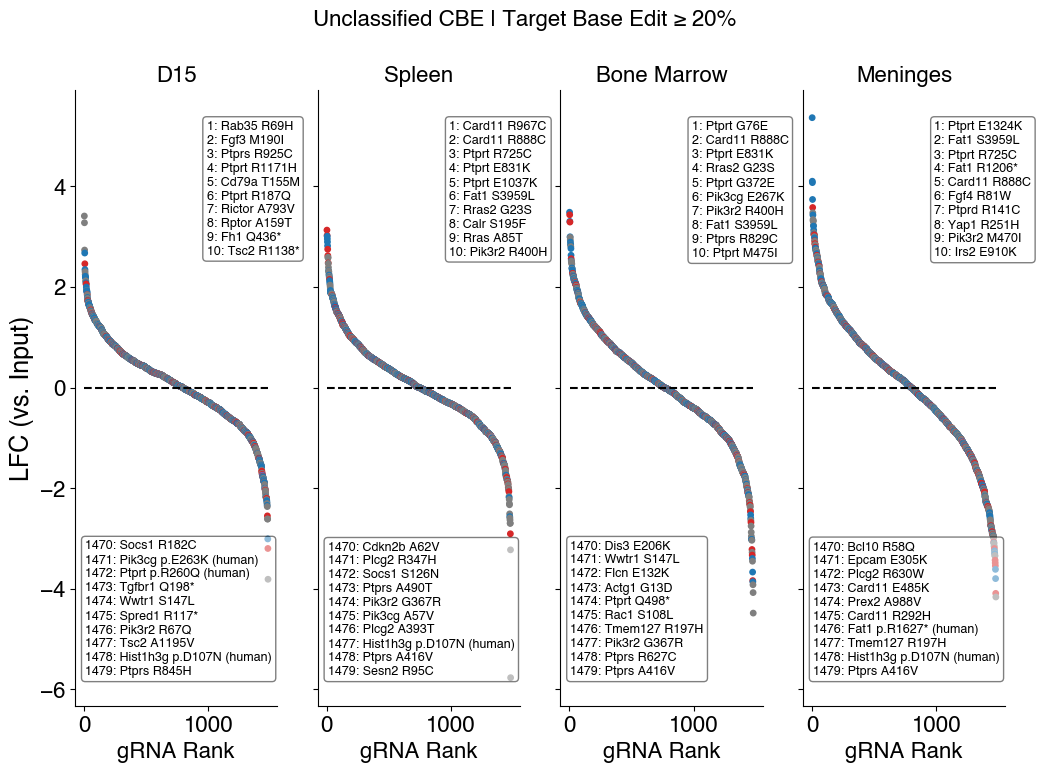

In [157]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20

gene_set_of_interest = 'Unclassified'

editor = 'CBE'

gene_set = list(MBES_targ[MBES_targ['classified']==False]['gene_name_h'])

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit) & (cc1['gene_name_h'].isin(gene_set))]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit) & (cc1['gene_name_h'].isin(gene_set))]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)
    if editor=='CBE':
        cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)
    elif editor =='ABE':
        cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)


    top = cc2[:10]
    bottom = cc2[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    for i, val2 in top.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{val2["Rank"]}: {b} {a}')

    textstr = '\n'.join(t)
    #textstr = '1: Gata3 R275W /n 2: Prdm14 P413L'
    #textstr = 'asdkjfh\nalkdjfhasd'

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    ax[k].text(0.65, 0.95, textstr, transform=ax[k].transAxes, fontsize=9,
    verticalalignment='top', horizontalalignment='left',bbox=props)

    t = []
    x = []
    y = []
    c = []
    for i, val2 in bottom.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{val2["Rank"]}: {b} {a}')

    textstr = '\n'.join(t)
    #textstr = '1: Gata3 R275W /n 2: Prdm14 P413L'
    #textstr = 'asdkjfh\nalkdjfhasd'

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    ax[k].text(0.05, 0.05, textstr, transform=ax[k].transAxes, fontsize=9,
    verticalalignment='baseline', horizontalalignment='left',bbox=props)


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

fig.suptitle(f'{gene_set_of_interest} {editor} | Target Base Edit ≥ {min_edit}%', fontsize=16)

fig.savefig(f'figures/{gene_set_of_interest}_{editor}_minedit_{min_edit}.png', dpi=300)

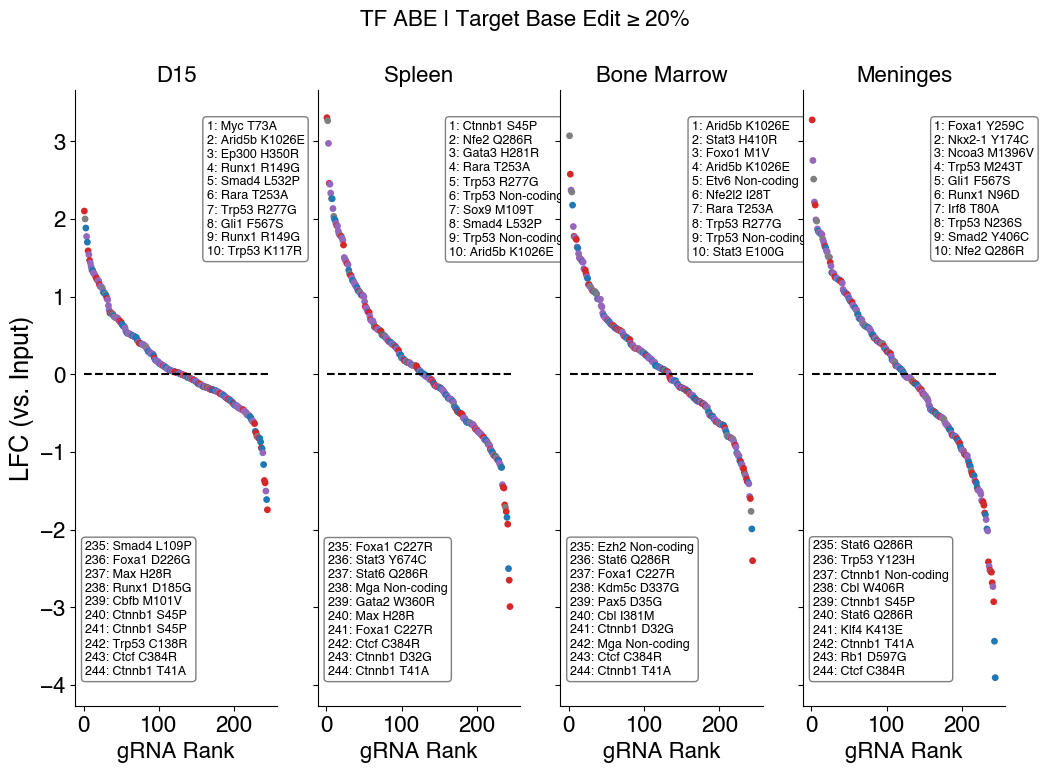

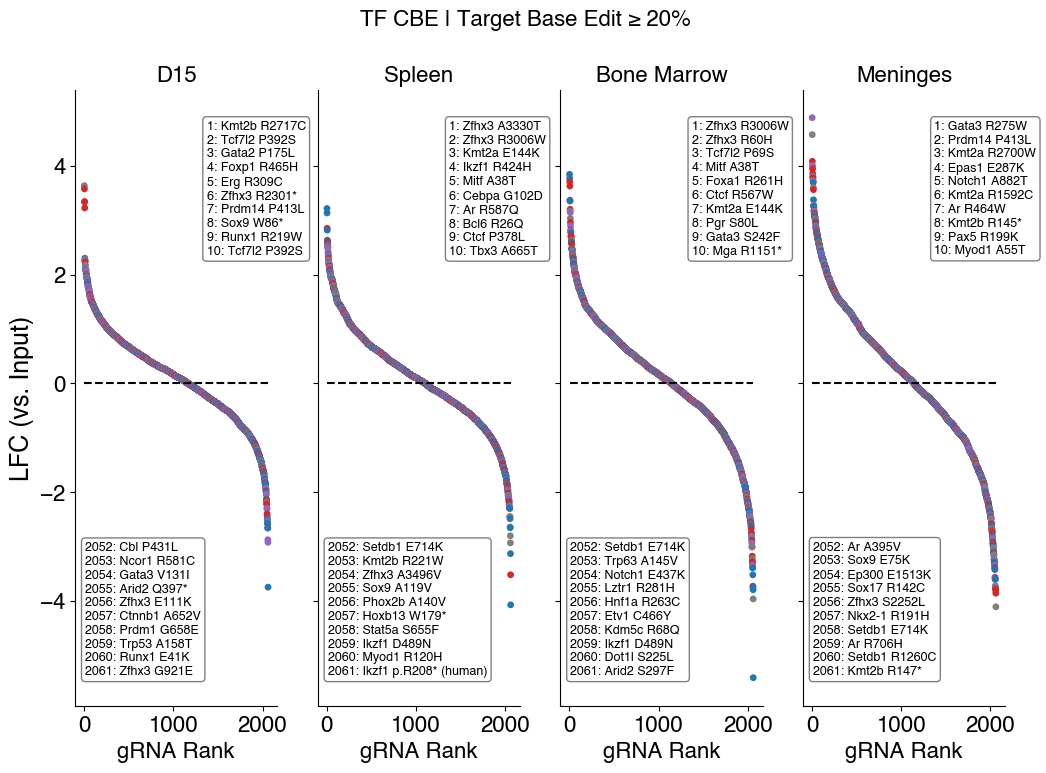

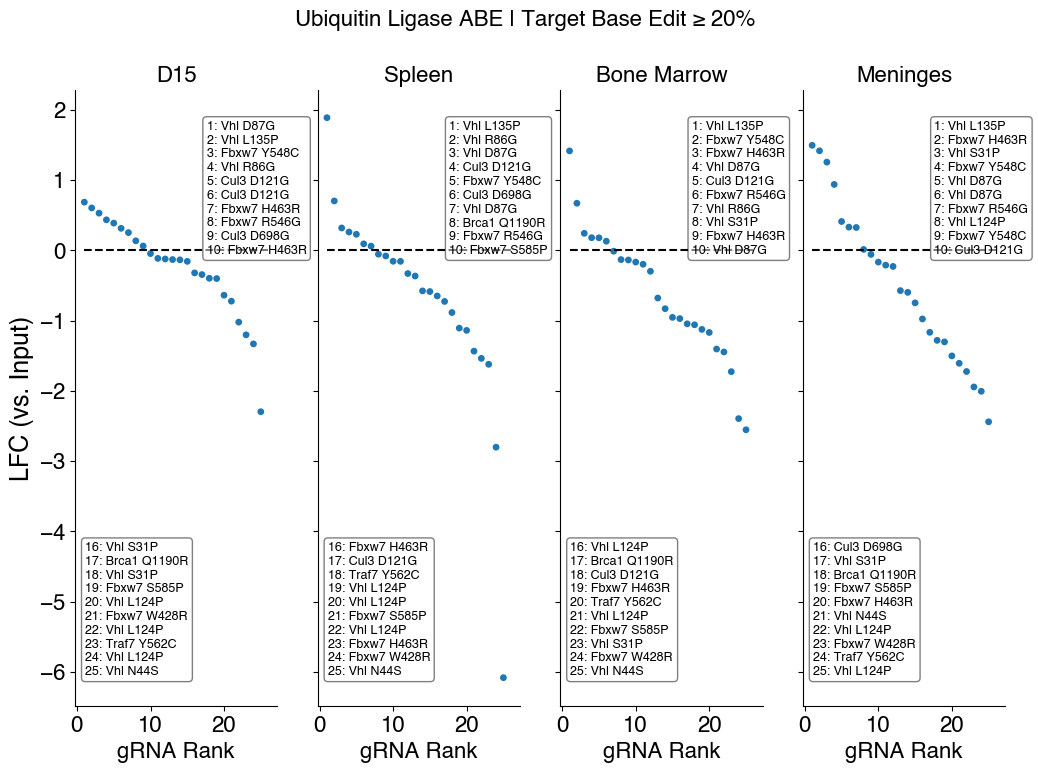

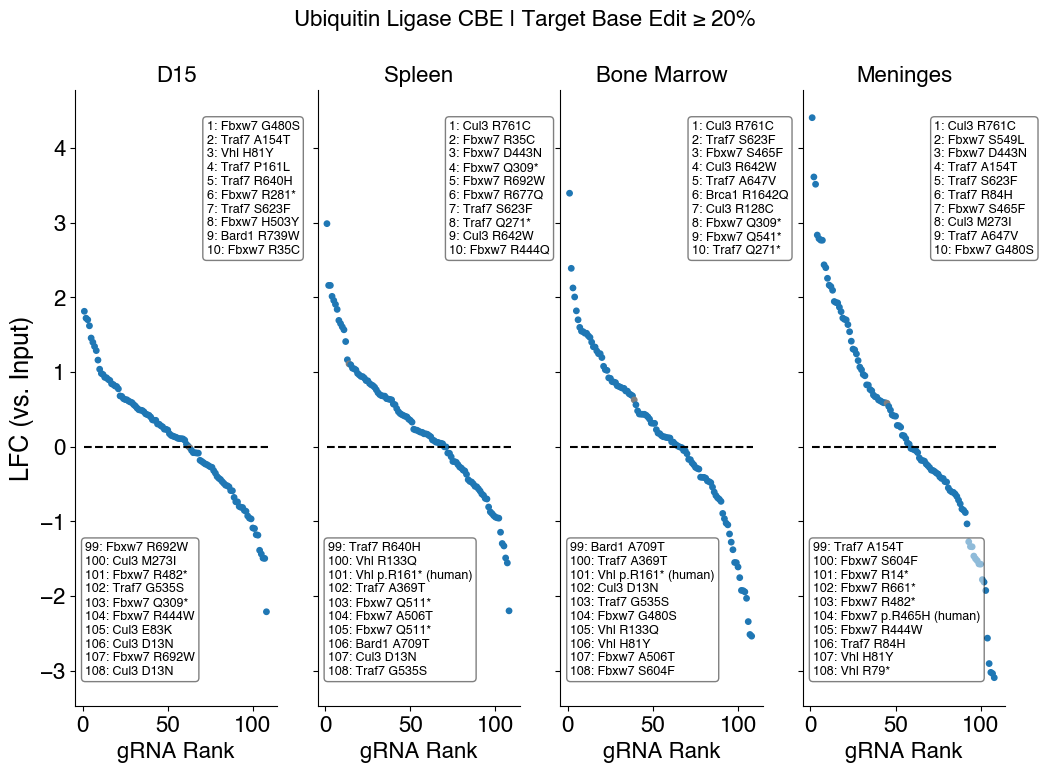

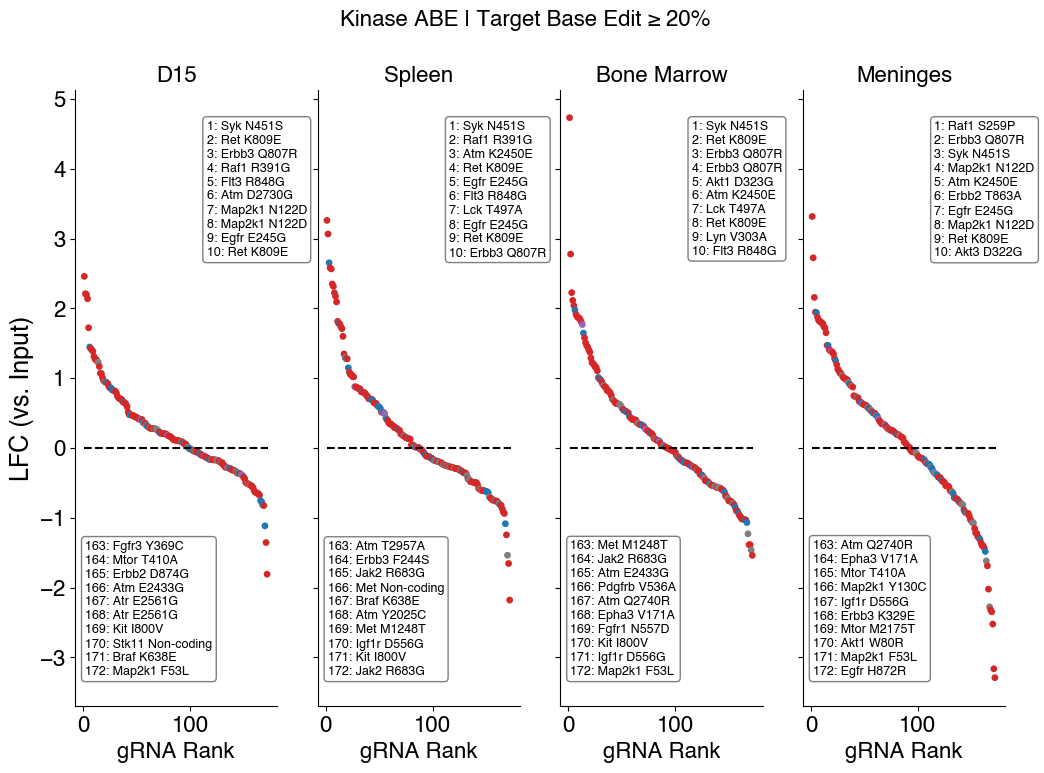

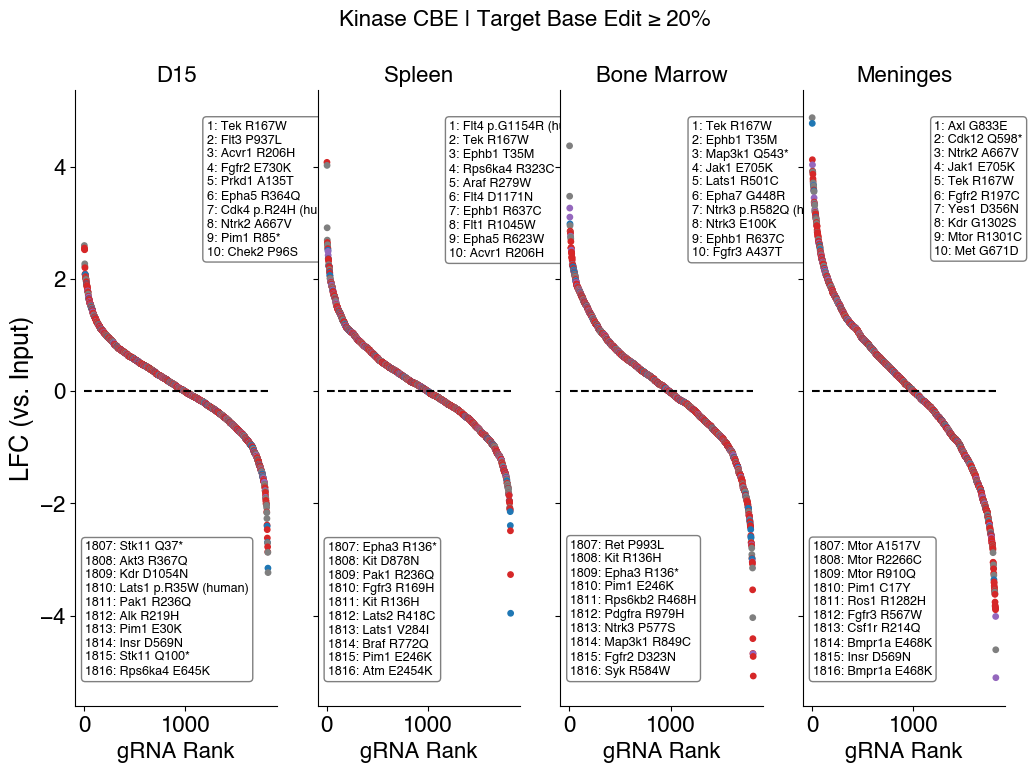

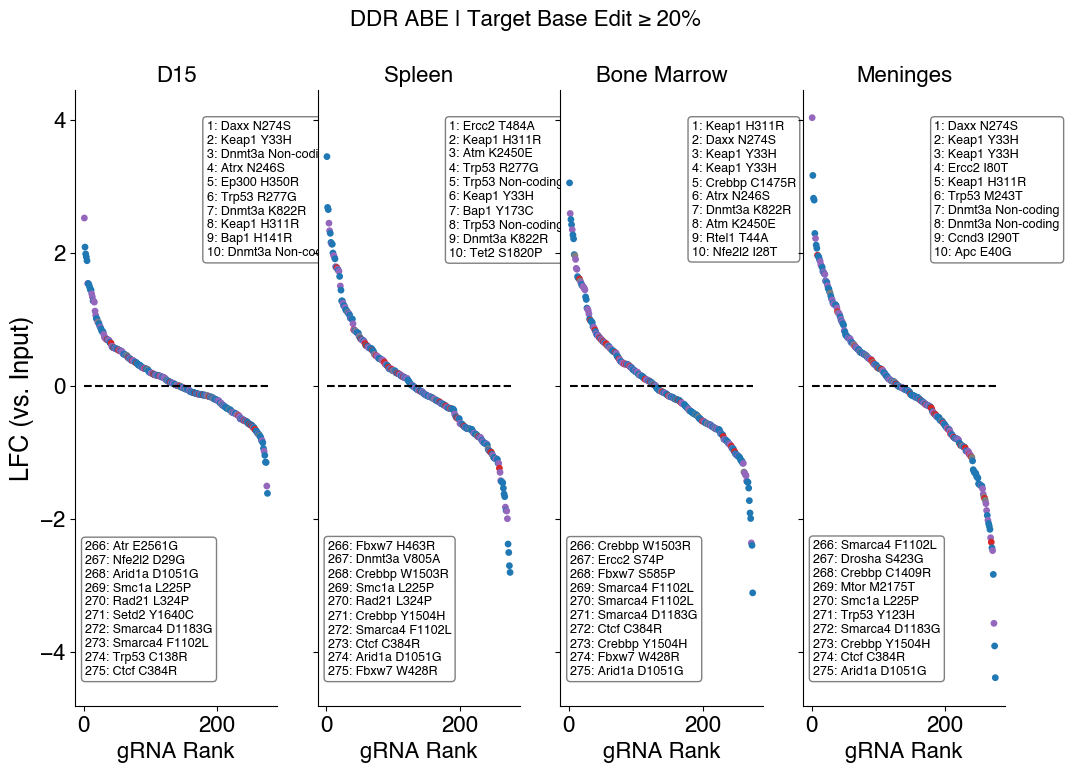

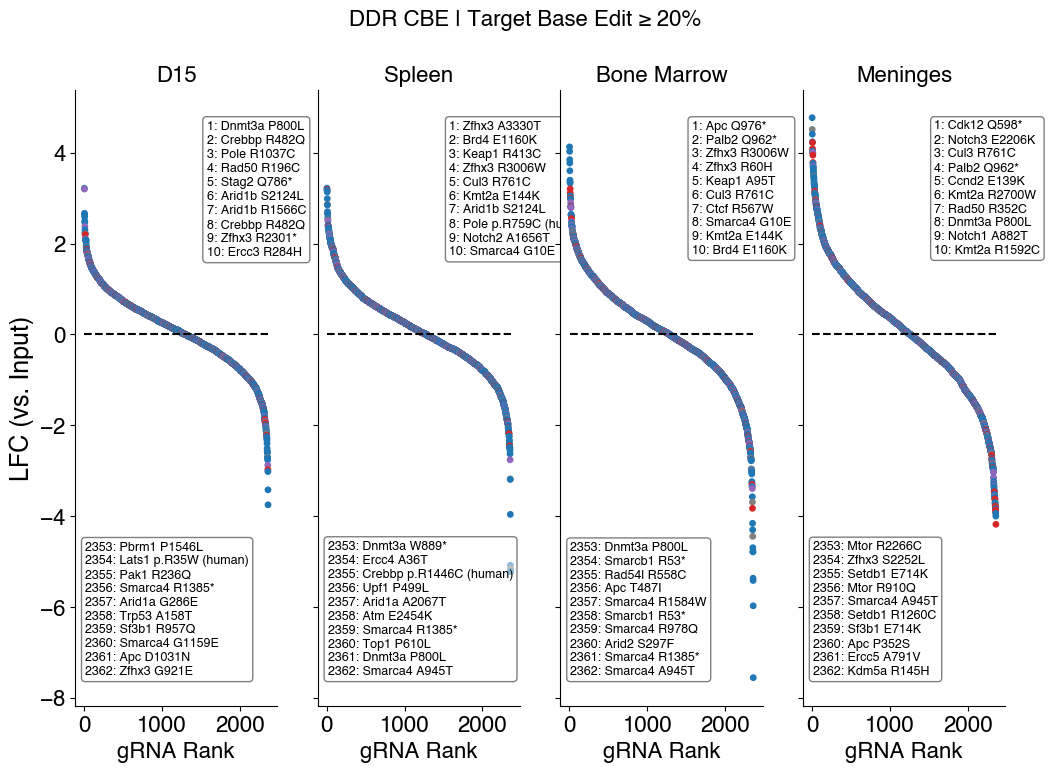

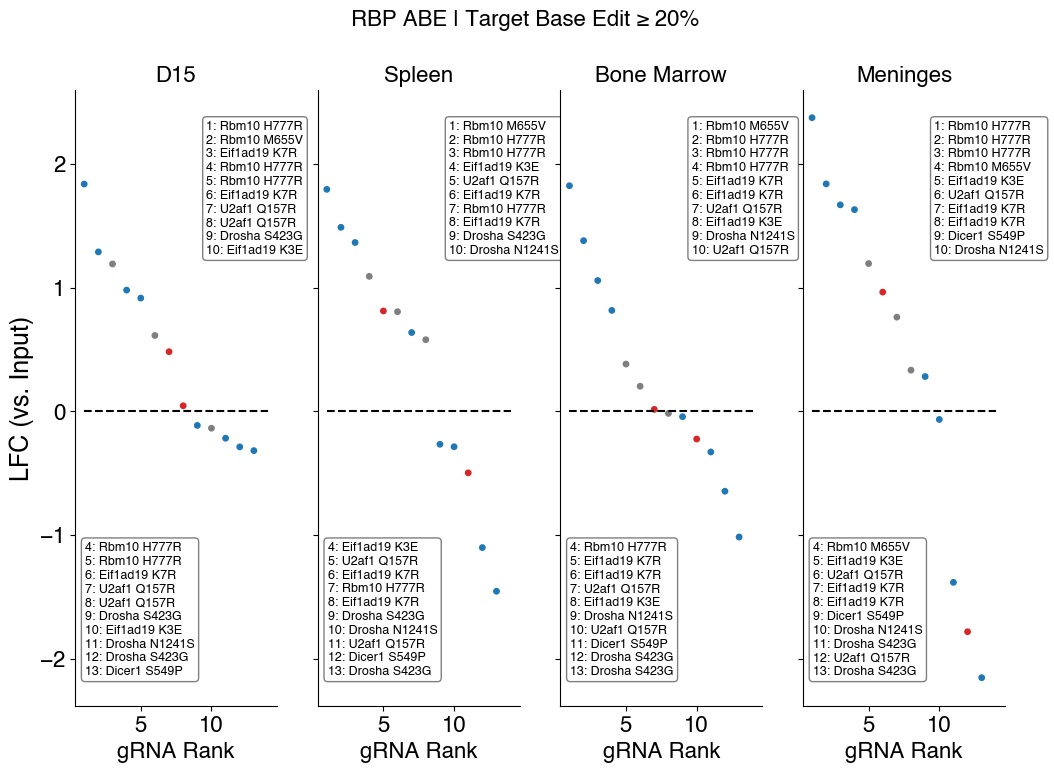

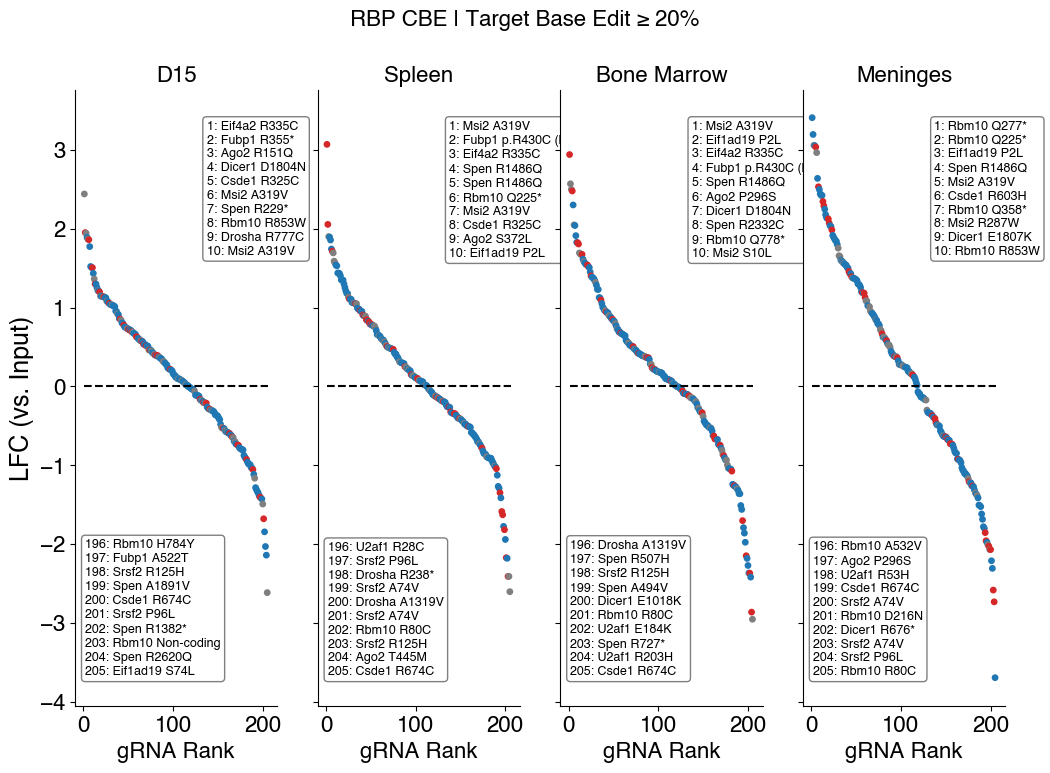

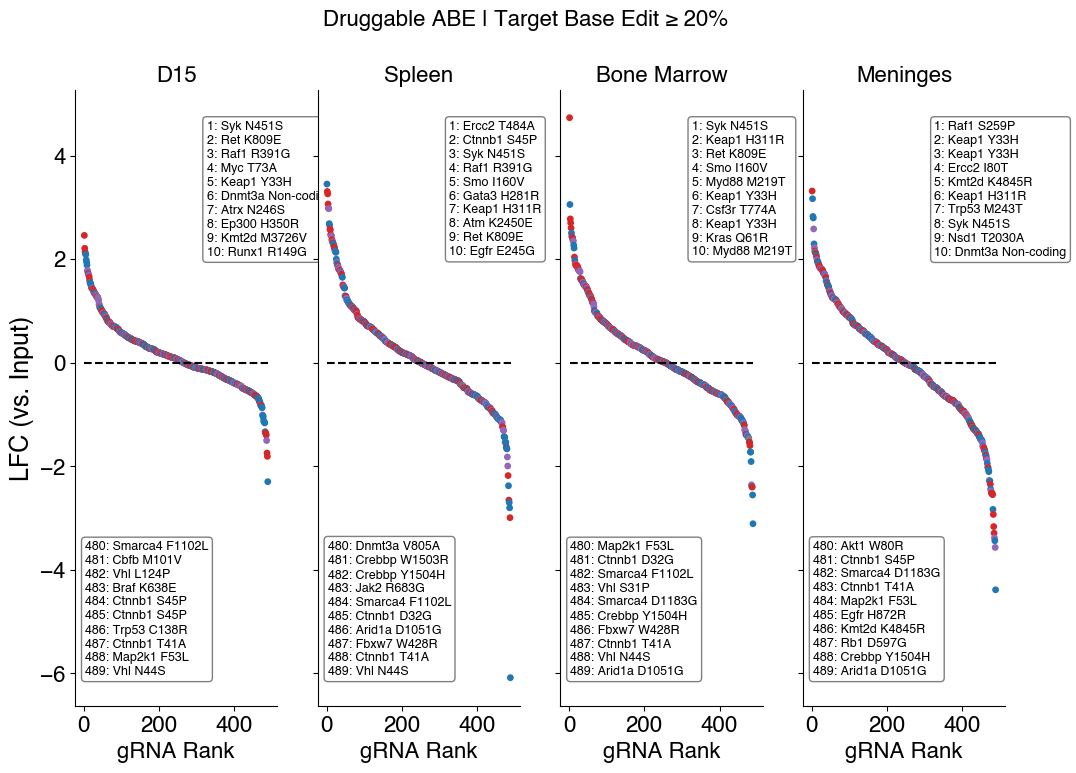

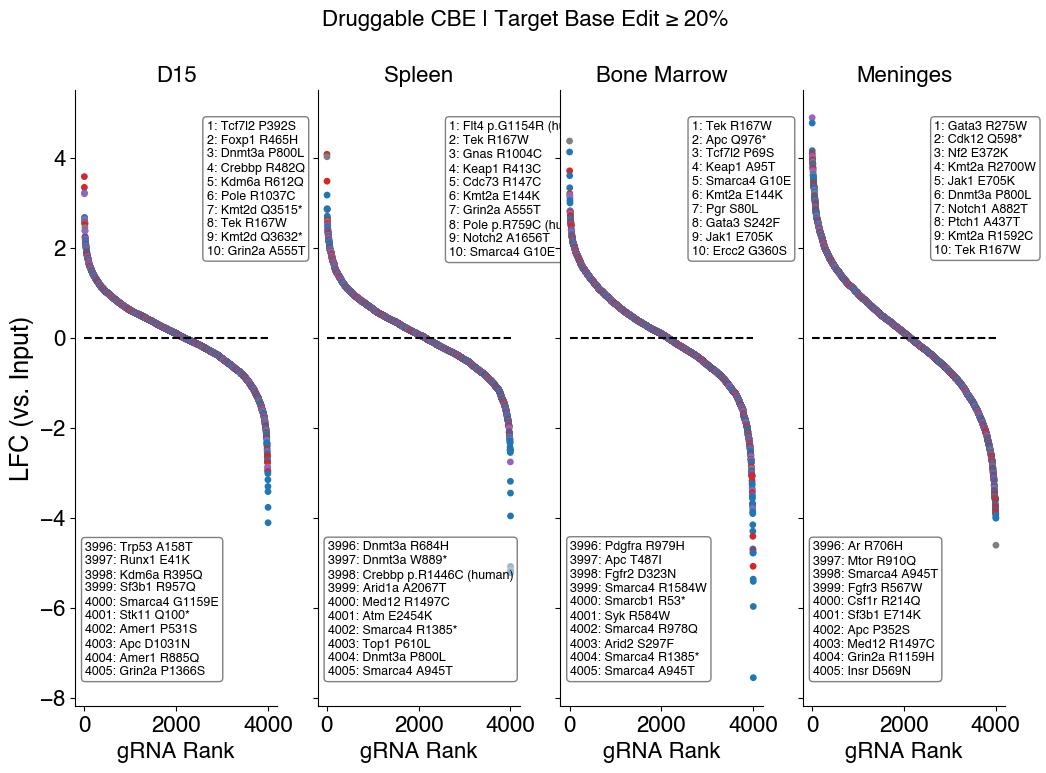

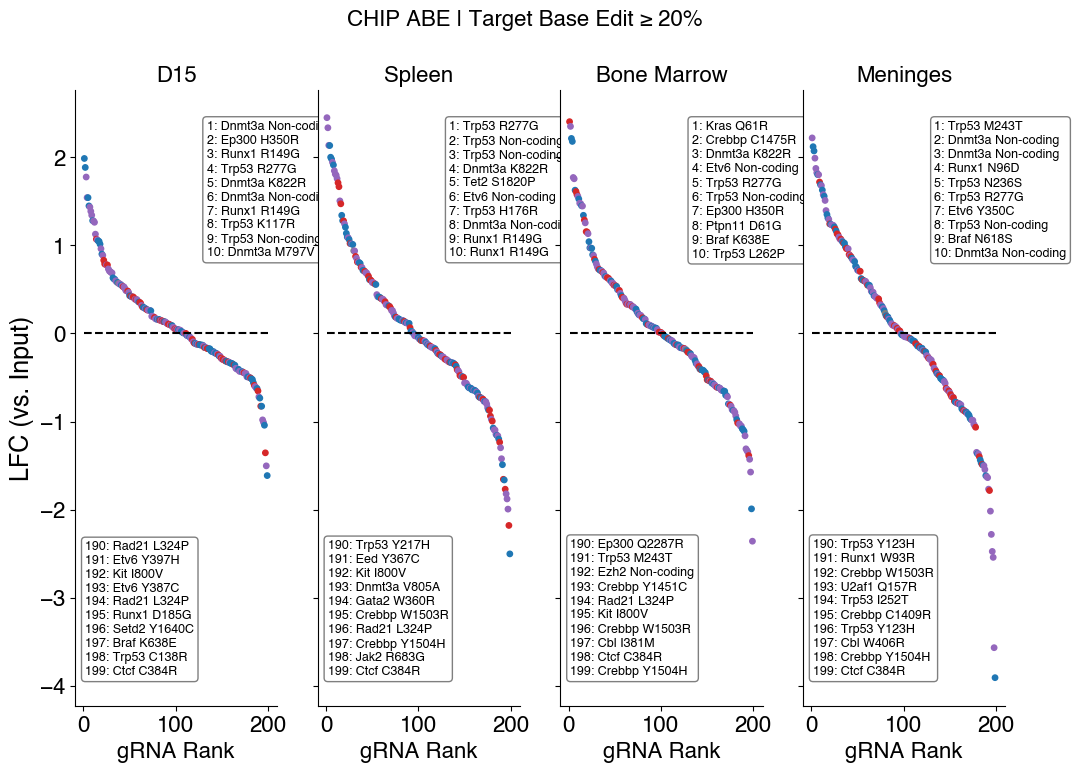

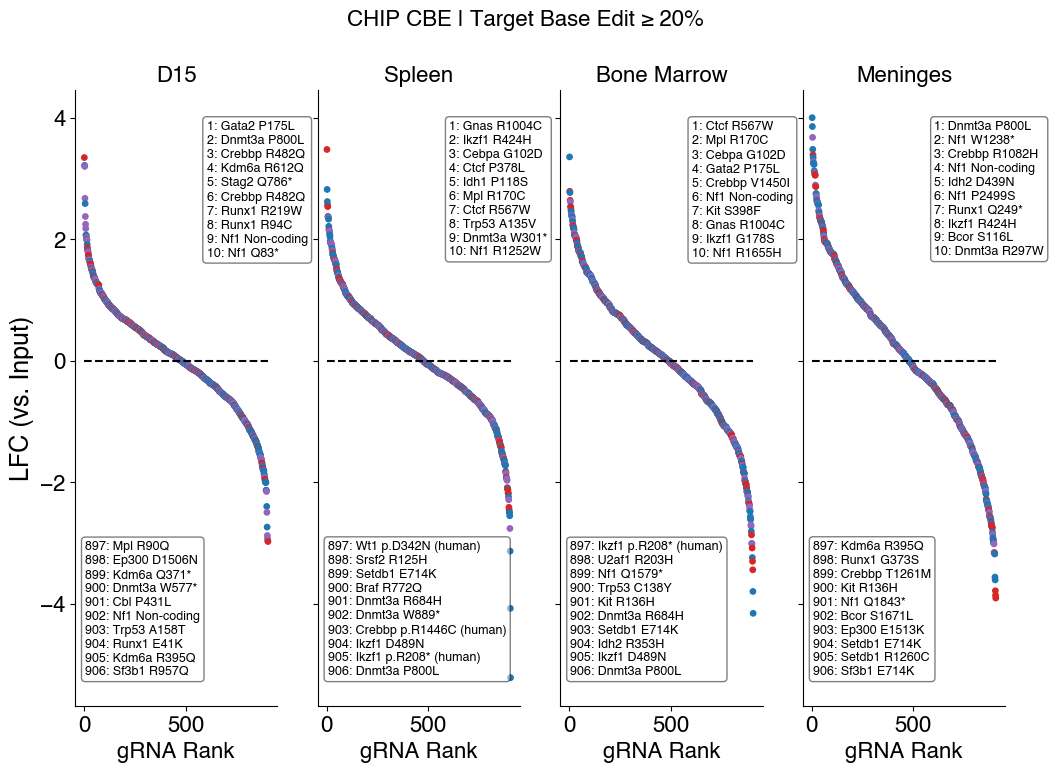

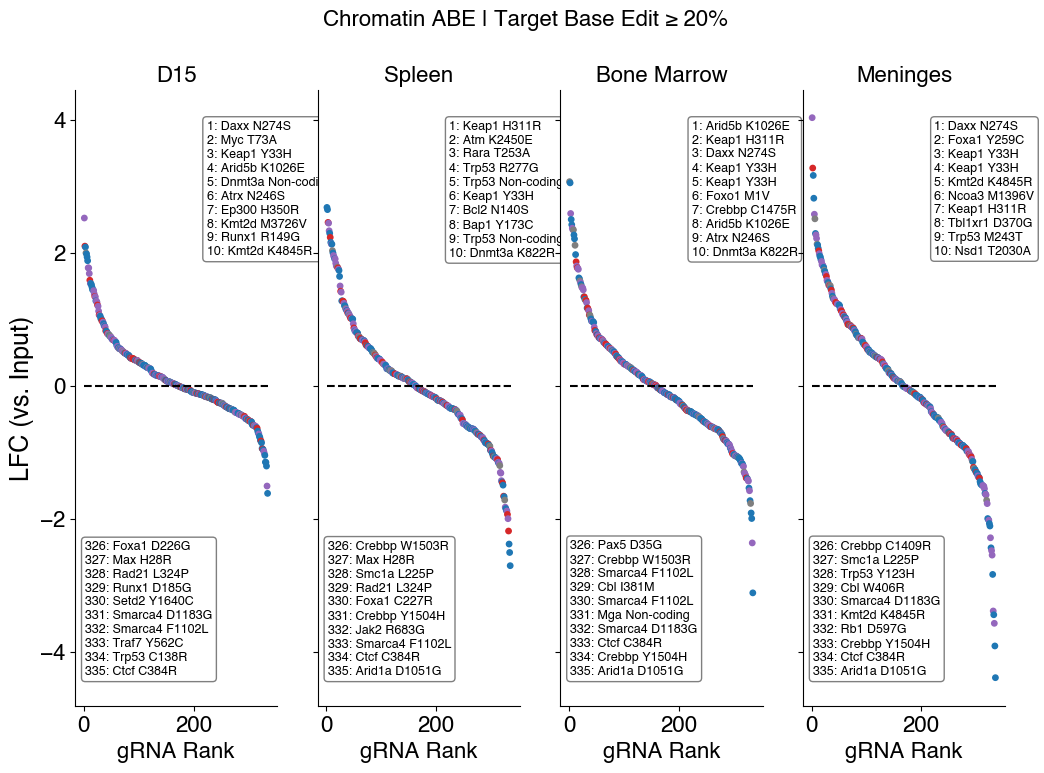

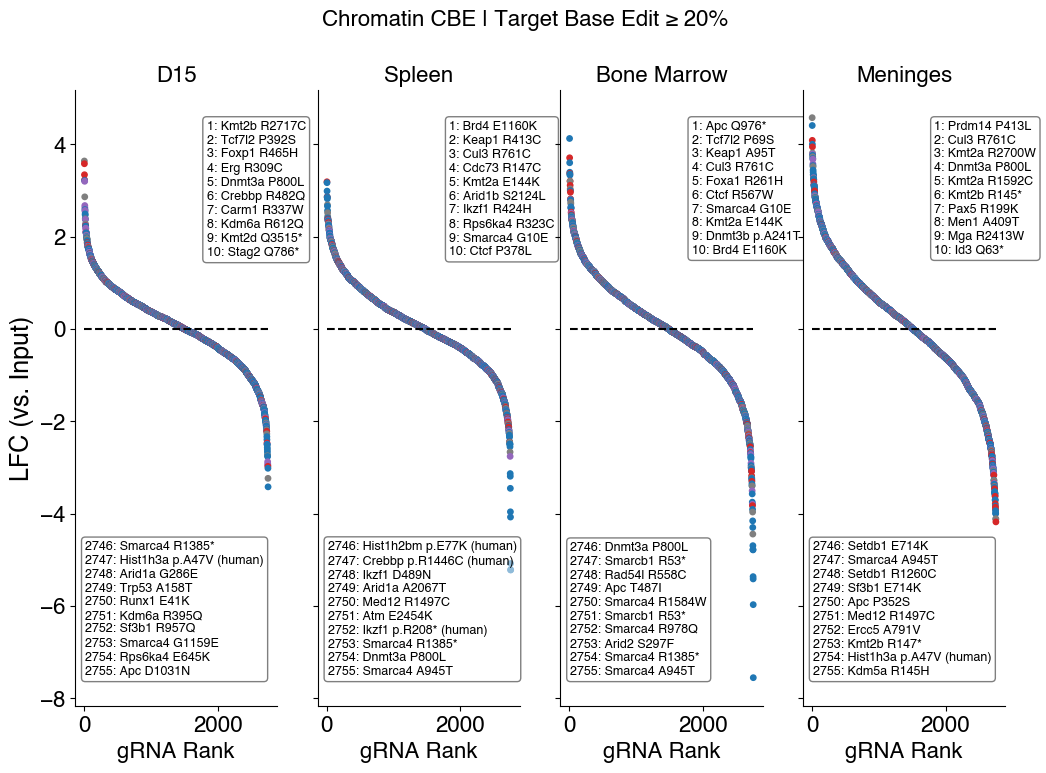

In [155]:
#generate all the plots

from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20

gene_set_of_interest = 'TF'

editor = 'ABE'

names = ['TF', 'Ubiquitin Ligase', 'Kinase', 'DDR', 'RBP', 'Druggable', 'CHIP', 'Chromatin']


for gene_set_of_interest in names:

    for editor in ['ABE', 'CBE']:

        gene_set = list(MBES_targ[MBES_targ[gene_set_of_interest]==True]['gene_name_h'])

        CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit) & (cc1['gene_name_h'].isin(gene_set))]
        ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit) & (cc1['gene_name_h'].isin(gene_set))]

        #-----and plotting--------
        names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

        color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

        fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

        for k, val in enumerate(names2):
            #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
            #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
            #cc2 = cc2.sort_values(by='LFC', ascending=False)
            if editor=='CBE':
                cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)
            elif editor =='ABE':
                cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

            cc2['Rank'] = range(1, len(cc2)+1)
            cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

            ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

            ax[k].spines[['top', 'right']].set_visible(False)
            ax[k].tick_params(axis='both', which='major', labelsize=16,)
            ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
            ax[k].set_xlabel('gRNA Rank', fontsize=16)


            top = cc2[:10]
            bottom = cc2[-10:]
            tb = pd.concat((top, bottom))

            t = []
            x = []
            y = []
            c = []
            for i, val2 in top.iterrows():
                y.append(val2[f'LFC_{val}'])
                x.append(val2['Rank'])
                c.append(val2['color'])
                a = val2['HGVSp_m']
                if a=='Not calculated (legacy)':
                    a = val2['HGVSp_h'] + ' (human)'
                b = val2['gene_name_m']
                t.append(f'{val2["Rank"]}: {b} {a}')

            textstr = '\n'.join(t)
            #textstr = '1: Gata3 R275W /n 2: Prdm14 P413L'
            #textstr = 'asdkjfh\nalkdjfhasd'

            props = dict(boxstyle='round', facecolor='white', alpha=0.5)

            ax[k].text(0.65, 0.95, textstr, transform=ax[k].transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='left',bbox=props)

            t = []
            x = []
            y = []
            c = []
            for i, val2 in bottom.iterrows():
                y.append(val2[f'LFC_{val}'])
                x.append(val2['Rank'])
                c.append(val2['color'])
                a = val2['HGVSp_m']
                if a=='Not calculated (legacy)':
                    a = val2['HGVSp_h'] + ' (human)'
                b = val2['gene_name_m']
                t.append(f'{val2["Rank"]}: {b} {a}')

            textstr = '\n'.join(t)
            #textstr = '1: Gata3 R275W /n 2: Prdm14 P413L'
            #textstr = 'asdkjfh\nalkdjfhasd'

            props = dict(boxstyle='round', facecolor='white', alpha=0.5)

            ax[k].text(0.05, 0.05, textstr, transform=ax[k].transAxes, fontsize=9,
            verticalalignment='baseline', horizontalalignment='left',bbox=props)


        #ax.set_ylim(0,20)

        ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
        ax[0].set_title('D15', fontsize=16)
        ax[1].set_title('Spleen', fontsize=16)
        ax[2].set_title('Bone Marrow', fontsize=16)
        ax[3].set_title('Meninges', fontsize=16)

        fig.suptitle(f'{gene_set_of_interest} {editor} | Target Base Edit ≥ {min_edit}%', fontsize=16)

        fig.savefig(f'figures/{gene_set_of_interest}_{editor}_minedit_{min_edit}.png', dpi=300)

In [112]:
cc2['gene_name_m']

4778      Gata3
9489     Prdm14
6122      Kmt2a
3118      Epas1
7894     Notch1
          ...  
7810     Nkx2-1
11074    Setdb1
394          Ar
11077    Setdb1
6227      Kmt2b
Name: gene_name_m, Length: 2061, dtype: object

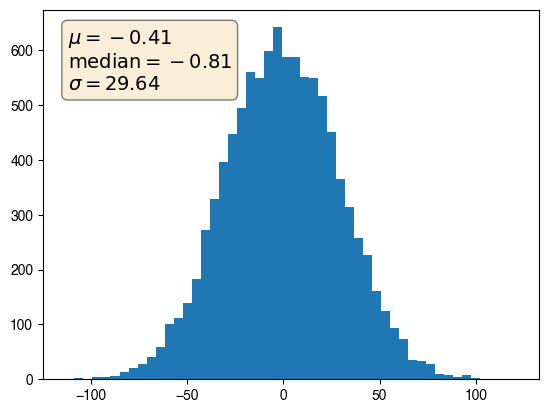

In [122]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

fig, ax = plt.subplots()
x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

In [123]:
textstr

'$\\mu=-0.41$\n$\\mathrm{median}=-0.81$\n$\\sigma=29.64$'